# РК 2 Билалов РТ5-61Б Вариант 2
Дерево решений	Градиентный бустинг

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score
import seaborn as sns

In [8]:
wine = load_wine()

print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [9]:
X = wine.data
y = wine.target

In [10]:
# проверим, что в данных нет пропусков
print(pd.DataFrame(X, columns=wine.feature_names).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [11]:
# Кодирование категориальных признаков и масштабирование числовых
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=3)

In [12]:
# Модель 1: Дерево решений
tree_model = DecisionTreeClassifier(random_state=3)
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

print('Accuracy дерева решений:', accuracy_score(y_test, tree_predictions))
print('F1 дерева решений:', f1_score(y_test, tree_predictions, average='weighted'))

Accuracy дерева решений: 0.8333333333333334
F1 дерева решений: 0.834920634920635


In [13]:
# Модель 2: Градиентный бустинг
boosting_model = GradientBoostingClassifier(random_state=3)
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)

print('Accuracy градиентного бустинга:', accuracy_score(y_test, boosting_predictions))
print('F1 градиентного бустинга:', f1_score(y_test, boosting_predictions, average='weighted'))


Accuracy градиентного бустинга: 0.9722222222222222
F1 градиентного бустинга: 0.972633744855967


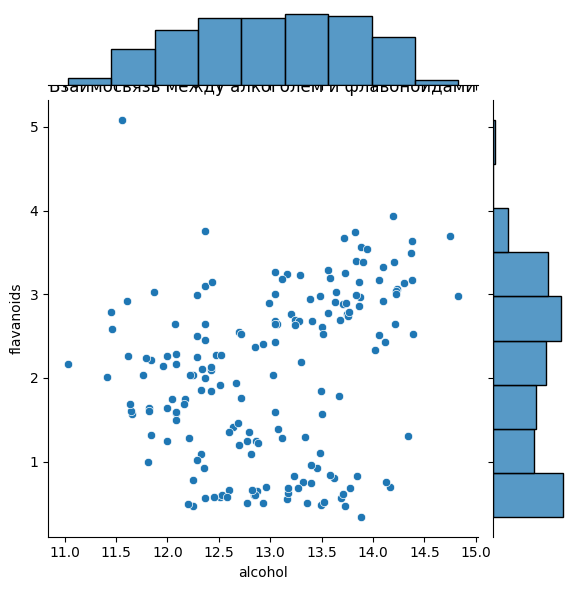

In [14]:
sns.jointplot(x='alcohol', y='flavanoids', data=pd.DataFrame(X, columns=wine.feature_names), kind='scatter')
plt.title("Взаимосвязь между алкоголем и флавоноидами")
plt.show()

## Выводы
1. Градиентный бустинг показал лучший результат на тестовой выборке (accuracy = 0.97, f1 = 0.97), чем дерево решений (accuracy = 0.83, f1 = 0.84). Это говорит о том, что градиентный бустинг лучше подходит для решения задачи классификации и в частном случае лучше определил классы при целевом признаке - типе вина.